In [ ]:
import librosa
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True) # mount to google drive

Mounted at /content/gdrive


In [ ]:
audio_files = pd.DataFrame(pd.read_excel("/content/gdrive/MyDrive/222 proj/data.xlsx")) # audio
audio_files

,file_name,assertiveness,enthusiasim,clairity,engagement
0,Aaron_Beverly.wav,8,6,9,9
1,b1.wav,3,3,5,2
2,b2.wav,6,7,5,7
3,champ.wav,9,10,9,10
4,harvard.wav,8,7,8,8
5,miss_teen.wav,6,6,2,4
6,obama_2020.wav,8,7,9,8
7,obama.wav,10,9,9,9
8,reporter.wav,7,5,3,4
9,socks.wav,4,4,2,3


In [ ]:
import tensorflow as tf
!pip install tensorflow_io
import tensorflow_io as tfio
def get_spectrogram(file_path):
  fileo = tf.io.read_file(file_path) # read file
  wav_file, sample_rate = tf.audio.decode_wav(fileo, desired_channels=1) # decode wav
  wav_file = tf.squeeze(wav_file, axis = 1)
  wav_file = tfio.audio.resample(wav_file, rate_in=tf.cast(sample_rate, dtype=tf.int64), rate_out=16000) # resample to 16000
  spectrogram = tf.signal.stft(wav_file, frame_length=512, frame_step=32) # convert to spectrogram
  spectrogram = tf.abs(spectrogram)
  spectrogram = tf.expand_dims(spectrogram, axis=2)
  return spectrogram

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 MB 18.2 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
spectrograms = [] # list of spectrograms
for file_name in audio_files["file_name"]:
  print(file_name)
  spectrogram = get_spectrogram("/content/gdrive/MyDrive/222 proj/audio_clips/" + file_name)
  spectrogram = spectrogram[0:15000] # cut to 30 seconds
  spectrograms.append(spectrogram) # append spectrogram audio data to audios. After the loop, audios will have the audio information of all the files as a spectrograms in different rows
audio_files.insert(0, "spectrogram", spectrograms) # inserting new audio column to audio_files


Aaron_Beverly.wav
b1.wav
b2.wav
champ.wav
harvard.wav


miss_teen.wav


obama_2020.wav
obama.wav
reporter.wav
socks.wav
Susan_Lozier_TED.wav
toast.wav
trudeau.wav
trudeau.wav
Woman.wav
the-price-of-shame-monica-lewinsky-ted_bPeL2a7k.wav
steve-jobs-stanford-commencement-speech-2005_glkoTZ98.wav
public-speaking-example-3_Jso631k6.wav
public-speaking-example-1_RFlXC5WZ.wav
Public Speaking Example 4.wav
president-nelson-mandela-inauguration-speech-may-10-1994_ebVx0SSO.wav
michelle-yeoh-addresses-the-harvard-law-school-class-of-2023_Mm1N9Uok.wav
ego-and-math-3blue1brown-stanford-math-department-commencement-speech-2023_8tAb7ueJ.wav
boy-gives-speech_c1bUFPNr.wav
a-meditation-on-rumi-and-the-power-of-poetry-leili-anvar-ted_hUSzceXH.wav
trimmed_speech1.wav
trimmed_speech2.wav
trimmed_speech3.wav
trimmed_speech4.wav
trimmed_speech5.wav
trimmed_speech6.wav


In [ ]:
audio_files.head() # check what audio_files looks like

,spectrogram,file_name,assertiveness,enthusiasim,clairity,engagement
0,"(((tf.Tensor(0.009793262, shape=(), dtype=floa...",Aaron_Beverly.wav,8,6,9,9
1,"(((tf.Tensor(0.05410304, shape=(), dtype=float...",b1.wav,3,3,5,2
2,"(((tf.Tensor(0.0017138796, shape=(), dtype=flo...",b2.wav,6,7,5,7
3,"(((tf.Tensor(0.009601584, shape=(), dtype=floa...",champ.wav,9,10,9,10
4,"(((tf.Tensor(0.005519243, shape=(), dtype=floa...",harvard.wav,8,7,8,8


<Axes: xlabel='enthusiasim', ylabel='Count'>

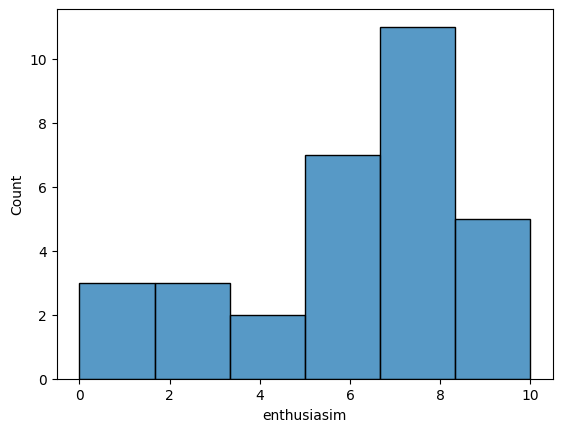

In [ ]:
import seaborn
from scipy import stats

quality = "enthusiasim" # THIS IS WHERE TO CHOOSE WHICH QUALITY WE WANT TO TRAIN THE MODEL ON
seaborn.histplot(data=audio_files[quality])


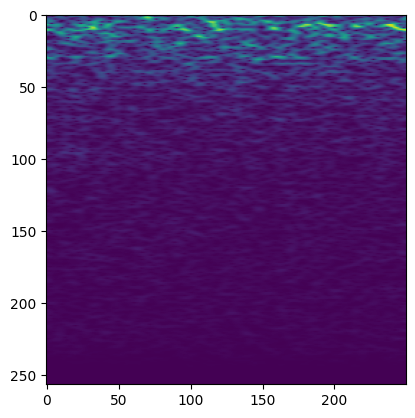

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(tf.transpose(audio_files['spectrogram'][0][3000:3250])[0]) # display section of spectrogram
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(audio_files.iloc[:, 0], audio_files[quality], test_size=0.25, random_state=48) # split into 80% 20% training testing datasets


In [ ]:
from tensorflow.python.framework import ops
# convert training and testing data lists into np array
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
# convert to tensor
x_train = np.array([tensor.numpy() for tensor in x_train])
x_test = np.array([tensor.numpy() for tensor in x_test])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

# create model
model = Sequential()
model.add(Conv2D(1, (5,5), activation='relu', input_shape=[15000, 257, 1]))
model.add(MaxPooling2D(pool_size=(5, 5)))
#model.add(Conv2D(1, (5,5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(5, 5)))
model.add(Flatten())
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='linear'))


In [ ]:
np.mean(y_test)

5.875

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

# train the model
history = model.fit(x_train, y_train, epochs = 10, validation_data=[x_test, y_test])

Epoch 1/10
1/1 [==============================] - 35s 35s/step - loss: 44.4135 - mae: 6.0962 - mse: 44.4135 - val_loss: 41.8633 - val_mae: 5.8740 - val_mse: 41.8633
Epoch 2/10
1/1 [==============================] - 32s 32s/step - loss: 44.3357 - mae: 6.0861 - mse: 44.3357 - val_loss: 41.8515 - val_mae: 5.8730 - val_mse: 41.8515
Epoch 3/10
1/1 [==============================] - 34s 34s/step - loss: 44.3235 - mae: 6.0853 - mse: 44.3235 - val_loss: 41.8398 - val_mae: 5.8720 - val_mse: 41.8398
Epoch 4/10
1/1 [==============================] - 32s 32s/step - loss: 44.3113 - mae: 6.0845 - mse: 44.3113 - val_loss: 41.8280 - val_mae: 5.8710 - val_mse: 41.8280
Epoch 5/10
1/1 [==============================] - 34s 34s/step - loss: 44.2992 - mae: 6.0837 - mse: 44.2992 - val_loss: 41.8163 - val_mae: 5.8700 - val_mse: 41.8163
Epoch 6/10
1/1 [==============================] - 34s 34s/step - loss: 44.2870 - mae: 6.0828 - mse: 44.2870 - val_loss: 41.8045 - val_mae: 5.8690 - val_mse: 41.8045
Epoch 7/10

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

# create model
clairity_model = Sequential()
clairity_model.add(Conv2D(1, (5,5), activation='relu', input_shape=[15000, 257, 1]))
clairity_model.add(MaxPooling2D(pool_size=(5, 5)))
clairity_model.add(Conv2D(1, (5,5), activation='relu'))
clairity_model.add(MaxPooling2D(pool_size=(5, 5)))
clairity_model.add(Flatten())
clairity_model.add(Dense(100, activation='relu'))
clairity_model.add(Dense(1, activation='linear'))


In [ ]:
y_pred = model.predict(x_test)

1/1 [==============================] - 3s 3s/step


In [ ]:
np.mean(y_test)

-0.05811813971325469

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

-2.1215146628142816


In [ ]:
from scipy.stats import spearmanr
coef, p = spearmanr(y_test, y_pred)
print(coef)

nan


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


In [ ]:
!mkdir saved_model
model.save("saved_models/" + quality) # create ability to save model for any quality

In [ ]:
!zip -r "saved_models.zip" "saved_models"

  adding: saved_models/ (stored 0%)
  adding: saved_models/enthusiasim/ (stored 0%)
  adding: saved_models/enthusiasim/fingerprint.pb (stored 0%)
  adding: saved_models/enthusiasim/variables/ (stored 0%)
  adding: saved_models/enthusiasim/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: saved_models/enthusiasim/variables/variables.index (deflated 64%)
  adding: saved_models/enthusiasim/saved_model.pb (deflated 87%)
  adding: saved_models/enthusiasim/keras_metadata.pb (deflated 90%)
  adding: saved_models/enthusiasim/assets/ (stored 0%)


In [ ]:
# after saving all different models...

In [ ]:
def test_speech(file_name, characteristic):
  if characteristic not in ("assertiveness", "enthusiasm", "clarity", "engagement"):
    print("Error: test_speech called with bad characteristic. Please use one of the following: assertiveness, enthusiasm, clarity, engagement")
    return -1

  model = tf.keras.models.load_model('saved_models/' + quality) # load in saved model

  spectrogram = get_spectrogram("/content/gdrive/MyDrive/222 proj/audio_clips/" + file_name)
  spectrogram = spectrogram[0:15000] # cut to 30 seconds
  return model.predict(spectrogram) # return prediction